In [67]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [68]:
df = pd.read_csv("./data/PLACES__County_Data__GIS_Friendly_Format___2023_release_20231107_filtered.csv")

filtered_col_names = df.columns

wo_fl = df[df["StateDesc"] != "Florida"]
clean_df = wo_fl[wo_fl["StateDesc"] != "District of Columbia"]

extra_data = pd.read_csv('./data/MainSheet-Table 1.csv')

In [69]:
# Function to calculate weighted average
def weighted_average(group):
    weights = group['TotalPopulation']
    exclude_cols = ['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'Geolocation']
    weighted_values = group.drop(exclude_cols, axis=1).multiply(weights, axis=0)
    weighted_sum = weighted_values.sum()
    total_weights = weights.sum()
    return weighted_sum / total_weights

# Grouping by 'StateDesc' and calculating weighted averages for other columns
state_df = clean_df.groupby('StateDesc').apply(weighted_average).reset_index()

merged_data = pd.merge(state_df, extra_data, on='StateDesc')

In [70]:
merged_data.columns

Index(['StateDesc', 'TotalPopulation', 'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev',
       'BINGE_AdjPrev', 'BPHIGH_AdjPrev', 'BPMED_AdjPrev', 'CANCER_AdjPrev',
       'CASTHMA_AdjPrev', 'CERVICAL_AdjPrev', 'CHD_AdjPrev', 'CHECKUP_AdjPrev',
       'CHOLSCREEN_AdjPrev', 'COLON_SCREEN_AdjPrev', 'COPD_AdjPrev',
       'COREM_AdjPrev', 'COREW_AdjPrev', 'CSMOKING_AdjPrev', 'DENTAL_AdjPrev',
       'DEPRESSION_AdjPrev', 'DIABETES_AdjPrev', 'GHLTH_AdjPrev',
       'HIGHCHOL_AdjPrev', 'KIDNEY_AdjPrev', 'LPA_AdjPrev', 'MAMMOUSE_AdjPrev',
       'MHLTH_AdjPrev', 'OBESITY_AdjPrev', 'PHLTH_AdjPrev', 'SLEEP_AdjPrev',
       'STROKE_AdjPrev', 'TEETHLOST_AdjPrev', 'HEARING_AdjPrev',
       'VISION_AdjPrev', 'COGNITION_AdjPrev', 'MOBILITY_AdjPrev',
       'SELFCARE_AdjPrev', 'INDEPLIVE_AdjPrev', 'DISABILITY_AdjPrev',
       'workout', 'all', 'mcdonalds', 'burgerking', 'tacobell', 'dominos',
       'kfc', 'mc_tb_do_kc', 'gdp_22'],
      dtype='object')

In [71]:
new_column_names = {
    'ACCESS2_AdjPrev': 'Health Insurance', 
    'ARTHRITIS_AdjPrev': 'Arthritis', 
    'BINGE_AdjPrev': 'Binge Drinking',
    'BPHIGH_AdjPrev': 'High Blood Pressure',
    'BPMED_AdjPrev': 'Blood Pressure Medication',
    'CANCER_AdjPrev': 'Cancer',
    'CASTHMA_AdjPrev': 'Asthma',
    'CERVICAL_AdjPrev': 'Cervical Cancer Screeening',
    'CHD_AdjPrev': 'Coronary Heart Disease',
    'CHECKUP_AdjPrev': 'Checkup Last Year',
    'CHOLSCREEN_AdjPrev': 'Cholesterol Screening',
    'COLON_SCREEN_AdjPrev': 'Colorectal Cancer Screening',
    'COPD_AdjPrev': 'Chronic Obstructive Pulmonary Disease',
    'CSMOKING_AdjPrev': 'Smoking',
    'DENTAL_AdjPrev': 'Dental Visits',
    'DEPRESSION_AdjPrev': 'Depression',
    'DIABETES_AdjPrev': 'Diabetes',
    'GHLTH_AdjPrev': 'Poor Self Rated Health Status',
    'HIGHCHOL_AdjPrev': 'High Cholesterol',
    'KIDNEY_AdjPrev': 'Chronic Kidney Disease',
    'LPA_AdjPrev':'No leisure-time Physical Activity',
    'MAMMOUSE_AdjPrev': 'Mammography',
    'MHLTH_AdjPrev': 'Bad Mental Health',
    'OBESITY_AdjPrev': 'Obesity',
    'PHLTH_AdjPrev': 'Bad Physical Health',
    'SLEEP_AdjPrev': 'Sleep < 7h',
    'STROKE_AdjPrev': 'Stroke',
    'TEETHLOST_AdjPrev': 'All Teeth Lost',
    'HEARING_AdjPrev': 'Hearing Disability',
    'VISION_AdjPrev': 'Vision Disability',
    'COGNITION_AdjPrev': 'Cognative Disability',
    'MOBILITY_AdjPrev': 'Mobility Disability',
    'SELFCARE_AdjPrev': 'Self-care Disability',
    'INDEPLIVE_AdjPrev': 'Independent Living Disability',
    'DISABILITY_AdjPrev': 'Disability',
    'workout': 'Excercising',
    'mcdonalds': 'McDonalds',
    'burgerking': 'Burger King',
    'tacobell': 'Taco Bell', 
    'dominos': 'Dominos',
    'kfc': 'KFC',
    'gdp_22': 'GDP',
    'all': 'Fastfood Availability',
    'mc_tb_do_kc': 'Fastfood'
    }

renamed_df = merged_data.rename(columns=new_column_names)

In [72]:
renamed_df["Excercising"].describe()

count    48.000000
mean     22.860417
std       4.575408
min      13.500000
25%      20.175000
50%      23.600000
75%      25.450000
max      32.500000
Name: Excercising, dtype: float64

In [73]:
# Splitting the data into training and testing sets (80% train, 20% test)
data = renamed_df.drop(["StateDesc"], axis=1)

#X = data.drop(["Obesity"], axis=1)
y = data["Obesity"]

X = data[["TotalPopulation", "GDP", "Excercising", "Smoking", 'Fastfood Availability']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_normalize = ['GDP', 'TotalPopulation']

# Initialize the MinMaxScaler
scaler = MinMaxScaler((0, 100))

# Fit and transform the selected columns
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train.drop(["TotalPopulation"], axis=1), y_train, sample_weight=X_train["TotalPopulation"])
# model.fit(X_train.drop(["TotalPopulation"], axis=1), y_train)

X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


y_pred = model.predict(X_test.drop(["TotalPopulation"], axis=1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 6.654905299865538
R-squared (R2): 0.39920927681155705


In [74]:
model.coef_

array([ 0.01428407, -0.26780554,  0.70545962, -0.12661356])

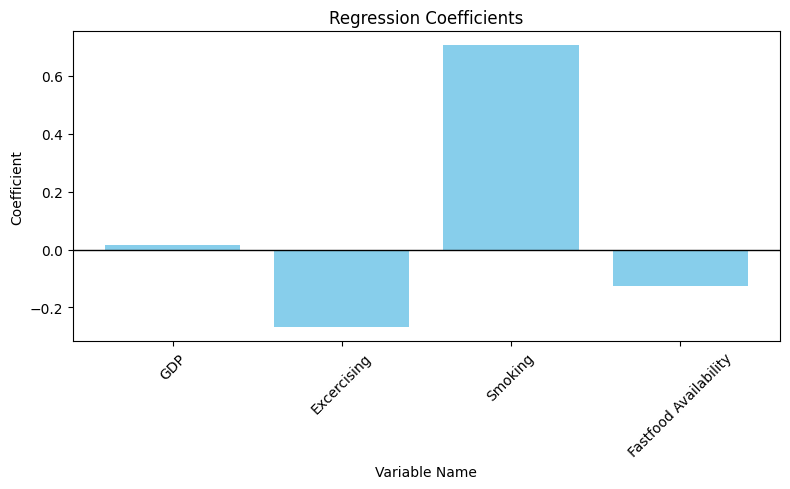

In [75]:
coef_df = pd.DataFrame({
    'name': ["GDP", "Excercising", "Smoking", 'Fastfood Availability'],
    'coefficient': model.coef_
})

plt.figure(figsize=(8, 5))  # Set the figure size (width, height)

# Create a bar plot
plt.bar(coef_df['name'], coef_df['coefficient'], color='skyblue')

# Set labels and title
plt.xlabel('Variable Name')
plt.ylabel('Coefficient')
plt.title('Regression Coefficients')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [76]:
data = renamed_df.drop(["StateDesc", "TotalPopulation",], axis=1)


X = data.drop(["Obesity"], axis=1)
y = data["Obesity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


columns_to_normalize = ['GDP']

# Initialize the MinMaxScaler
scaler = MinMaxScaler((0, 100))

# Fit and transform the selected columns
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Initialize PCA with desired number of components
num_components = 30  # You can choose the number of components
pca = PCA(n_components=num_components)

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)

X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

X_test_pca = pca.transform(X_test)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on the PCA-transformed training data
model.fit(X_train_pca, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error: 3.110351125658588
R-squared (R2): 0.7192041031459656


In [77]:
# Splitting the data into training and testing sets (80% train, 20% test)
data = renamed_df.drop(["StateDesc"], axis=1)

#X = data.drop(["Obesity"], axis=1)
y = data["Obesity"]

X = data[["TotalPopulation", "GDP", "Excercising", "Smoking", 'Fastfood Availability']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_normalize = ['GDP', 'TotalPopulation']

# Initialize the MinMaxScaler
scaler = MinMaxScaler((0, 100))

# Fit and transform the selected columns
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Creating a linear regression model
rf = RandomForestRegressor(random_state=42)


# Fitting the model with the training data
rf.fit(X_train.drop(["TotalPopulation"], axis=1), y_train, sample_weight=X_train["TotalPopulation"])
# model.fit(X_train.drop(["TotalPopulation"], axis=1), y_train)

X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


y_pred = rf.predict(X_test.drop(["TotalPopulation"], axis=1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 10.26403435412236
R-squared (R2): 0.07338476738823174


In [78]:
# Splitting the data into training and testing sets (80% train, 20% test)
new_column_names = {
        'BINGE_AdjPrev': 'Binge Drinking',
        'ACCESS2_AdjPrev': 'Health Insurance', 
        'GHLTH_AdjPrev': 'Poor Self Rated Health Status',
        'OBESITY_AdjPrev': 'Obesity',
        'MAMMOUSE_AdjPrev': 'Mammography',
        'CSMOKING_AdjPrev': 'Smoking',
        'DENTAL_AdjPrev': 'Dental Visits',
}

clean_df_renamed = clean_df.rename(columns=new_column_names)

data = clean_df_renamed

#X = data.drop(["Obesity"], axis=1)
y = data["Obesity"]

X = data[["TotalPopulation", "Binge Drinking", "Health Insurance", "Smoking", 'Poor Self Rated Health Status', 'Mammography', 'Dental Visits']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

columns_to_normalize = ['TotalPopulation']
scaler = MinMaxScaler()
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Creating a linear regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train.drop(["TotalPopulation"], axis=1), y_train, sample_weight=X_train["TotalPopulation"])

X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])


y_pred = model.predict(X_test.drop(["TotalPopulation"], axis=1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

model.coef_

Mean Squared Error (MSE): 12.749771411184357
R-squared (R2): 0.3906111504530343


array([-0.06798716,  0.3116351 ,  1.07786225,  0.17421921,  0.05294744,
        0.16113867])

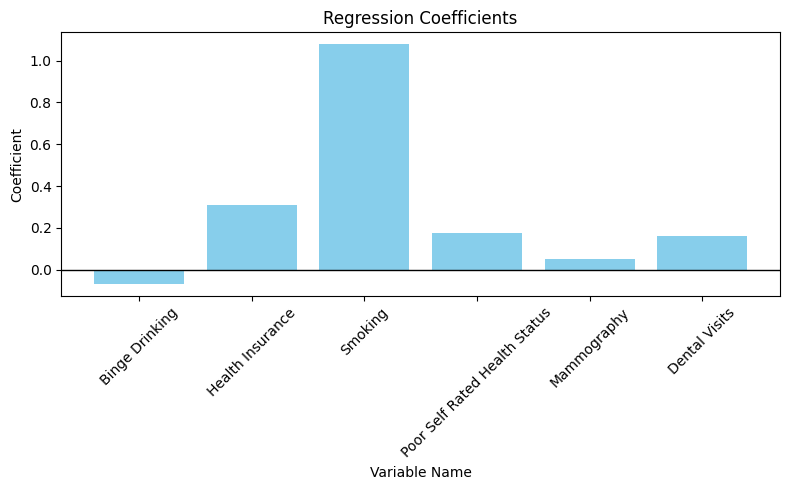

In [79]:
coef_df = pd.DataFrame({
    'name': ["Binge Drinking", "Health Insurance", "Smoking", 'Poor Self Rated Health Status', 'Mammography', 'Dental Visits'],
    'coefficient': model.coef_
})

plt.figure(figsize=(8, 5))  # Set the figure size (width, height)

# Create a bar plot
plt.bar(coef_df['name'], coef_df['coefficient'], color='skyblue')

# Set labels and title
plt.xlabel('Variable Name')
plt.ylabel('Coefficient')
plt.title('Regression Coefficients')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fitting the model
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 6.6703077983739805
R-squared (R2): 0.6811855629184427


In [83]:
print(clean_df.columns)

y = clean_df['OBESITY_AdjPrev']

X = clean_df.drop(["StateDesc", 'Geolocation', 'StateAbbr', 'CountyName', 'CountyFIPS', 'TotalPopulation', 'OBESITY_AdjPrev'], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize PCA with desired number of components
num_components = 30  # You can choose the number of components
pca = PCA(n_components=num_components)

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on the PCA-transformed training data
model.fit(X_train_pca, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation',
       'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev', 'BINGE_AdjPrev',
       'BPHIGH_AdjPrev', 'BPMED_AdjPrev', 'CANCER_AdjPrev', 'CASTHMA_AdjPrev',
       'CERVICAL_AdjPrev', 'CHD_AdjPrev', 'CHECKUP_AdjPrev',
       'CHOLSCREEN_AdjPrev', 'COLON_SCREEN_AdjPrev', 'COPD_AdjPrev',
       'COREM_AdjPrev', 'COREW_AdjPrev', 'CSMOKING_AdjPrev', 'DENTAL_AdjPrev',
       'DEPRESSION_AdjPrev', 'DIABETES_AdjPrev', 'GHLTH_AdjPrev',
       'HIGHCHOL_AdjPrev', 'KIDNEY_AdjPrev', 'LPA_AdjPrev', 'MAMMOUSE_AdjPrev',
       'MHLTH_AdjPrev', 'OBESITY_AdjPrev', 'PHLTH_AdjPrev', 'SLEEP_AdjPrev',
       'STROKE_AdjPrev', 'TEETHLOST_AdjPrev', 'HEARING_AdjPrev',
       'VISION_AdjPrev', 'COGNITION_AdjPrev', 'MOBILITY_AdjPrev',
       'SELFCARE_AdjPrev', 'INDEPLIVE_AdjPrev', 'DISABILITY_AdjPrev',
       'Geolocation'],
      dtype='object')
Mean Squared Error: 5.138597088604873
R-squared (R2): 0.7543953011296046
